In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('chip_test.csv')
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


In [4]:
mask=data.loc[:,'pass']==1

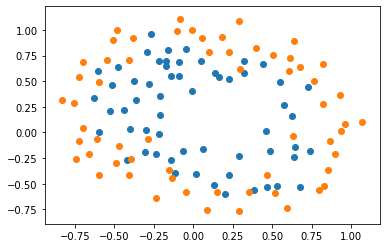

In [6]:
import matplotlib.pyplot as plt
fig1=plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])

In [7]:
X=data.drop(['pass'],axis=1)
y=data.loc[:,'pass']
X1=data.loc[:,'test1']
X2=data.loc[:,'test2']

In [10]:
X1_2=X1*X1
X2_2=X2*X2
X1_X2=X1*X2
X_new={
    'X1':X1,
    'X2':X2,
    'X1_2':X1_2,
    'X2_2':X2_2,
    'X1_X2':X1_X2
}
X_new=pd.DataFrame(X_new)
X_new.head()

,X1,X2,X1_2,X2_2,X1_X2
0,0.051267,0.69956,0.002628,0.489384,0.035864
1,-0.092742,0.68494,0.008601,0.469143,-0.063523
2,-0.213710,0.69225,0.045672,0.479210,-0.147941
3,-0.375000,0.50219,0.140625,0.252195,-0.188321
4,0.183760,0.93348,0.033768,0.871385,0.171536


In [11]:
from sklearn.linear_model import LogisticRegression
LR2=LogisticRegression()
LR2.fit(X_new,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
from sklearn.metrics import accuracy_score
y2_predict=LR2.predict(X_new)
accuracy_score(y,y2_predict)

0.8135593220338984

In [13]:
X1_new=X1.sort_values()
theta0=LR2.intercept_
theta1,theta2,theta3,theta4,theta5=LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]

In [14]:
a=theta4
b=theta5*X1_new+theta2
c=theta0+theta1*X1_new+theta3*X1_new*X1_new
X2_new_boundary=(-b+np.sqrt(b*b-4*a*c))/(2*a)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


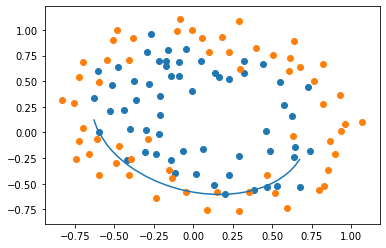

In [15]:
fig1=plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_new,X2_new_boundary)

In [16]:
def f(X):
    a=theta4
    b=theta5*X+theta2
    c=theta0+theta1*X+theta3*X*X
    X2_new_boundary1=(-b+np.sqrt(b*b-4*a*c))/(2*a)
    X2_new_boundary2=(-b-np.sqrt(b*b-4*a*c))/(2*a)
    return X2_new_boundary1,X2_new_boundary2

In [17]:
X2_new_boundary1=[]
X2_new_boundary2=[]
for x in X1_new:
    X2_new_boundary1.append(f(x)[0])
    X2_new_boundary2.append(f(x)[1])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


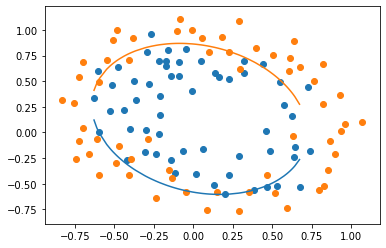

In [18]:
fig1=plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_new,X2_new_boundary1)
plt.plot(X1_new,X2_new_boundary2)

In [21]:
X1_range=[-0.9+x/10000 for x in range(0,19000)]
X1_range=np.array(X1_range)
X2_new_boundary1=[]
X2_new_boundary2=[]
for x in X1_range:
    X2_new_boundary1.append(f(x)[0])
    X2_new_boundary2.append(f(x)[1])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


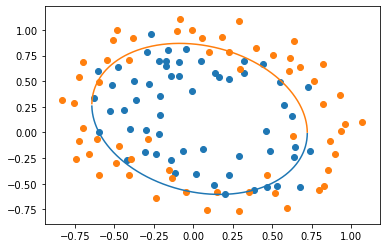

In [22]:
fig1=plt.figure()
passed=plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed=plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_range,X2_new_boundary1)
plt.plot(X1_range,X2_new_boundary2)